In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from time import time

Point A, B, C, D

In [2]:
Id = sp.csr_matrix(np.eye(2))
X = sp.csr_matrix(np.array([[0,1],[1,0]]))
Y = sp.csr_matrix(np.array([[0,-1j],[1j,0]]))
Z = sp.csr_matrix(np.array([[1,0],[0,-1]]))

In [3]:
def Z_j(j, L):
    if not (j>0 and j<L+1):
        raise ValueError("It must hold 0<j<L+1")
    if j==1:    # inizialization of first matrix in the tensor product
        full_matrix = Z
    else:
        full_matrix = Id
    for i in range(2,L+1):    # loop to define the tensor product matrix
        if i == j:
            full_matrix = sp.kron(full_matrix, Z, format='csr')
        else:
            full_matrix = sp.kron(full_matrix, Id, format='csr')
    return full_matrix

def X_j(j, L):
    if not (j>0 and j<L+1):
        raise ValueError("It must hold 0<j<L+1")
    if j==1:    # inizialization of first matrix in the tensor product
        full_matrix = X
    else:
        full_matrix = Id
    for i in range(2,L+1):    # loop to define the tensor product matrix
        if i == j:
            full_matrix = sp.kron(full_matrix, X, format='csr')
        else:
            full_matrix = sp.kron(full_matrix, Id, format='csr')
    return full_matrix

In [4]:
def gen_Hamiltonian(L, g, J=1):
    H = sp.csr_matrix((2**L, 2**L), dtype=np.float64)
    H -= J*X_j(L,L)*X_j(1,L) + g*Z_j(L,L)
    for i in range(1,L):
        H -= J*X_j(i,L)*X_j(i+1,L) + g*Z_j(i,L)
    return H

In [5]:
H = gen_Hamiltonian(12,0.1)
H.toarray()

array([[-1.2,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. , -1. , -1. , ...,  0. ,  0. ,  0. ],
       [ 0. , -1. , -1. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  1. , -1. ,  0. ],
       [ 0. ,  0. ,  0. , ..., -1. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  1.2]])

point E

In [6]:
t_0 = time()
e_values, V = sp.linalg.eigsh(H, 7)
print("runtime:", time()-t_0)

runtime: 0.20397210121154785


In [7]:
t_1 = time()
e_values, V = np.linalg.eigh(H.toarray()) # much slower procedure
print("runtime:", time()-t_1)

runtime: 7.834914445877075


point F, G

In [20]:
GS = {}
GS_energy = {}
ES_1_energy = {}
ES_2_energy = {}
Corr = {}

for L in range(6,13,2):
    A = []
    B = []
    C = []
    D = []
    E = []
    for i in range(0,20):
        g = i/10
        H = gen_Hamiltonian(L,g)
        e_values, V = sp.linalg.eigsh(H, 3, which='SA', return_eigenvectors=True)

        A.append(V[:,0])
        B.append(e_values[0])
        C.append(e_values[1])
        D.append(e_values[2])
        E.append(np.vdot(V[:,0], X_j(1,L)*X_j(L/2+1,L)*V[:,0]))

    GS["GS_{}".format(L)] = np.array(A)
    GS_energy["GS_energy_{}".format(L)] = np.array(B)
    ES_1_energy["ES_1_energy_{}".format(L)] = np.array(C)
    ES_2_energy["ES_2_energy_{}".format(L)] = np.array(D)
    Corr["Corr_{}".format(L)] = np.array(E)

In [21]:
Corr

{'Corr_6': array([1.        , 0.99749028, 0.98982803, 0.97649459, 0.95625536,
        0.92673401, 0.88422077, 0.82444042, 0.74510908, 0.64948889,
        0.5471515 , 0.44953988, 0.36448124, 0.29459659, 0.23897777,
        0.19528953, 0.16103256, 0.13404832, 0.11262784, 0.09546824]),
 'Corr_8': array([1.        , 0.99749057, 0.98984565, 0.97667927, 0.95716658,
        0.92958353, 0.89042602, 0.83345215, 0.7506285 , 0.63883494,
        0.50978929, 0.38651524, 0.28569235, 0.21047533, 0.15650969,
        0.11808802, 0.09052604, 0.0704788 , 0.05566542, 0.04454545]),
 'Corr_10': array([1.        , 0.99749057, 0.98984637, 0.97669639, 0.95731834,
        0.93034213, 0.89292091, 0.83892057, 0.75694543, 0.63514273,
        0.48240004, 0.33627544, 0.22549647, 0.15121485, 0.10324011,
        0.07213288, 0.0515699 , 0.03765705, 0.02802481, 0.02121257]),
 'Corr_12': array([1.        , 0.99749057, 0.9898464 , 0.97669795, 0.95734317,
        0.930538  , 0.89387028, 0.84191297, 0.7622303 , 0.63490022,


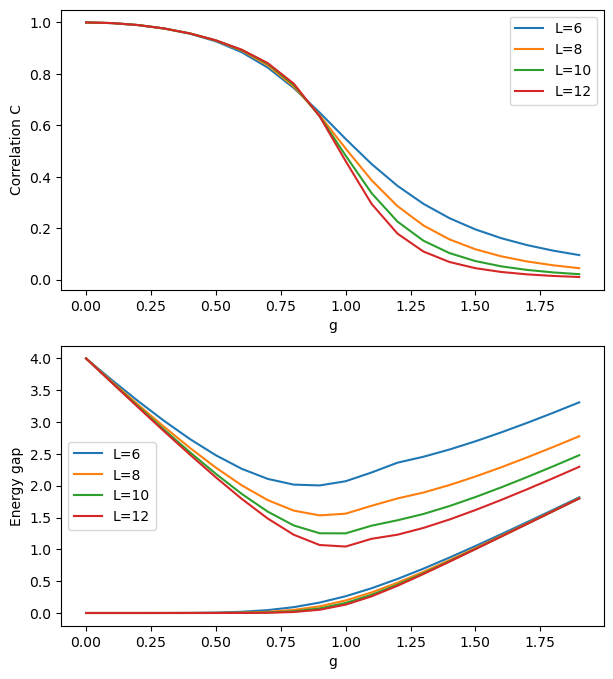

In [29]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(7,8))

ax1.set_xlabel('g')
ax1.set_ylabel('Correlation C')
ax2.set_xlabel('g')
ax2.set_ylabel('Energy gap')

g = [i/10 for i in range(0,20)]
colors = {}
for i, el in enumerate(GS):
    L = 6+2*i
    delta_E_1 = ES_1_energy["ES_1_energy_{}".format(L)]-GS_energy["GS_energy_{}".format(L)]
    delta_E_2 = ES_2_energy["ES_2_energy_{}".format(L)]-GS_energy["GS_energy_{}".format(L)]
    
    color = ax1.plot(g, Corr["Corr_{}".format(L)], label="L={}".format(L))[0].get_color()
    colors[L] = color
    ax2.plot(g, delta_E_1, label="L={}".format(L), color=color)
    ax2.plot(g, delta_E_2, color=color)

ax1.legend()
ax2.legend()